In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,Cho Thuê Phòng Q10.rộng rãi.b côg.mới keng.tần...,❤Còn 3 phòng cho thuê như hình hoặc Nguyên Tần...,room,rent,2.5,TPHCM,Quận 10,Phường 12,Tô Hiến Thành,106.672699,10.773972,Trieu Anh,838999988,16,0,0
1,Khai Trương Phòng Trọ Sinh Viên Ngay Lotte,"Vị trí : 364 Lê Đức Thọ, Phường 6 , Gò VấpƯU Đ...",room,rent,3.3,TPHCM,Quận Gò Vấp,Phường 6,364 Lê Đức Thọ,106.682907,10.842569,Trung Nhân,886220506,30,0,0
2,"Phòng Đẹp ngay MT 29 Bàu Cát 6, P.14, Q Tân Bì...","+ Phòng cho thuê đẹp ngay MT 29 Bàu Cát 6, Phư...",room,rent,2.0,TPHCM,Quận Tân Bình,Phường 14,Bàu Cát 6,106.641304,10.793849,Lê Huy Hoàng,937554570,16,0,0
3,"Cho thuê Phòng trọ mới xây mặt tiền Gò Dầu,...","Cho thuê Phòng trọ mới xây có thang máy, giờ t...",room,rent,2.3,TPHCM,Quận Tân Phú,Phường Tân Quý,178 Gò Dầu,106.621914,10.794777,LÊ VĂN DŨNG,983238568,40,0,0
4,"Phòng 50m2,phù hợp gia đình nhỏ,ban công rất r...","Nhà mới, thiết kế đẹp, rộng rãi, vị trí ngay g...",room,rent,5.5,TPHCM,Quận Bình Thạnh,Phường 13,Đặng Thùy Trâm,106.702690,10.831265,nguyen chi huong,902400145,50,0,0


# Data exploration

In [3]:
df.drop(['bedrooms', 'bathrooms', 'title', 'description', 'property_type', 'transaction_type', 'owner_name', 'owner_contact'], axis=1, inplace=True)
df.head()

,price,province,district,ward,street,location_latitude,location_longitude,area
0,2.5,TPHCM,Quận 10,Phường 12,Tô Hiến Thành,106.672699,10.773972,16
1,3.3,TPHCM,Quận Gò Vấp,Phường 6,364 Lê Đức Thọ,106.682907,10.842569,30
2,2.0,TPHCM,Quận Tân Bình,Phường 14,Bàu Cát 6,106.641304,10.793849,16
3,2.3,TPHCM,Quận Tân Phú,Phường Tân Quý,178 Gò Dầu,106.621914,10.794777,40
4,5.5,TPHCM,Quận Bình Thạnh,Phường 13,Đặng Thùy Trâm,106.702690,10.831265,50


In [4]:
df.shape

(450, 8)

In [6]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'street', 'location_latitude',
       'location_longitude', 'area'],
      dtype='object')

# Data visualization

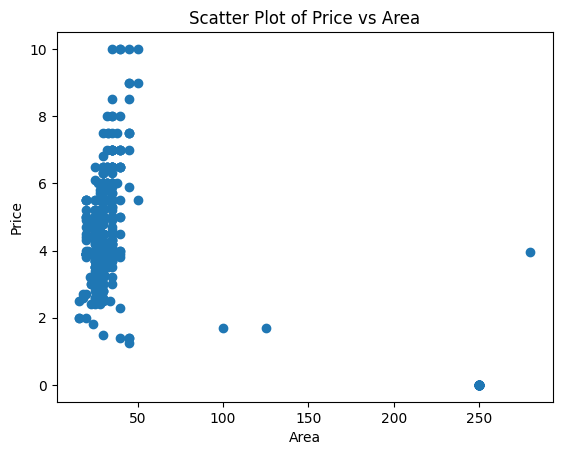

In [5]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()
